In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [3]:
number_of_features = 5000
data = reuters.load_data(num_words = number_of_features)
(X_train, y_train) , (X_test, y_test)= data

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# Data encoding
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode='binary' )
features_test  = tokenizer.sequences_to_matrix(X_test, mode='binary')

In [5]:
# One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

### Question 1: Build an MLP (only MLP structure) deep neural network to classify Reuters news-wire data into 46 different categories
#### Question 5: Add checkpoints and early stopping

In [53]:
## MLP structure

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss',mode = "min", patience=3, verbose=1)

model_checkpoints = ModelCheckpoint("HW6_Khanna.h5", 
                                    save_best_only=True, monitor='val_loss', mode='min', save_freq='epoch')

In [60]:
tf.random.set_seed(64)

def best_model(best_para):

    model = Sequential()
    model.add(Dense(best_para["neurons1"], activation='selu')) # Layer 1
    model.add(Dropout(0.2))

    model.add(Dense(best_para["neurons2"], activation='selu')) # Layer 2
    model.add(Dropout(0.2))

    model.add(Dense(46, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= best_para["optimizer"],
                  metrics=['accuracy']) 

    model.fit(features_train, Y_train, epochs=best_para["epochs"], batch_size=300, validation_data=(features_test, Y_test), 
              callbacks=[early_stop, model_checkpoints])
    
    return model

### Question 1: Exploratory data analysis


In [8]:
# statistics over all 46 classes

import collections
import statistics

labels = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
           'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
           'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
           'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
           'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

train_doc_count = collections.Counter(y_train)
test_doc_count = collections.Counter(y_test)
mean_words_train = [statistics.mean([len(e) for e in X_train[y_train.flatten() == i]]) for i in range(46)]
mean_words_test = [statistics.mean([len(e) for e in X_test[y_test.flatten() == i]]) for i in range(46)]

In [9]:
train_temp = []
for i,j in sorted(train_doc_count.items()):
    train_temp.append(j)

test_temp = []
for i,j in sorted(test_doc_count.items()):
    test_temp.append(j)
    
df = pd.DataFrame()

In [10]:
df["Class"] = labels 
df["train_doc_count"] = train_temp # of documents in train set
df["test_doc_count"] = test_temp # of documents in test set
df["mean_words_train"] = mean_words_train # Mean # of words in train set
df["mean_words_test"] = mean_words_test # Mean # of words in test set

In [11]:
df

,Class,train_doc_count,test_doc_count,mean_words_train,mean_words_test
0,cocoa,55,12,225.781818,250.166667
1,grain,432,105,188.668981,187.428571
2,veg-oil,74,20,184.864865,150.850000
3,earn,3159,813,87.671415,84.356704
4,acq,1949,474,135.825038,137.546414
5,wheat,17,5,213.352941,103.600000
6,copper,48,14,154.458333,149.428571
7,housing,16,3,180.375000,91.000000
8,money-supply,139,38,191.482014,186.947368
9,coffee,101,25,225.871287,168.040000


/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


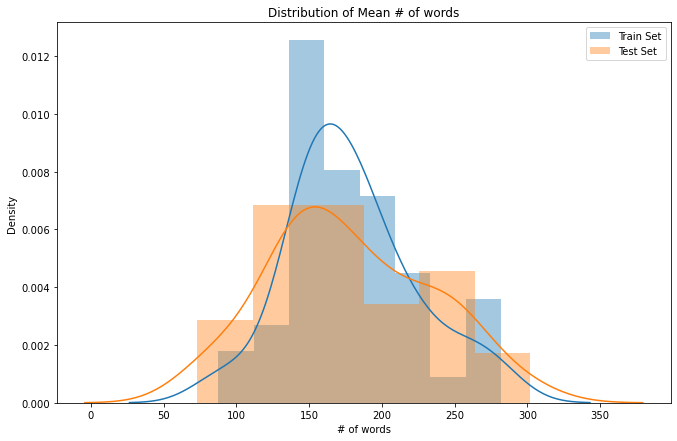

In [12]:
plt.figure(figsize=(11,7))
sns.distplot(df["mean_words_train"], label="Train Set")
sns.distplot(df["mean_words_test"], label="Test Set")
plt.xlabel("# of words")
plt.legend()
plt.title("Distribution of Mean # of words")
plt.show()

<Figure size 1080x504 with 0 Axes>

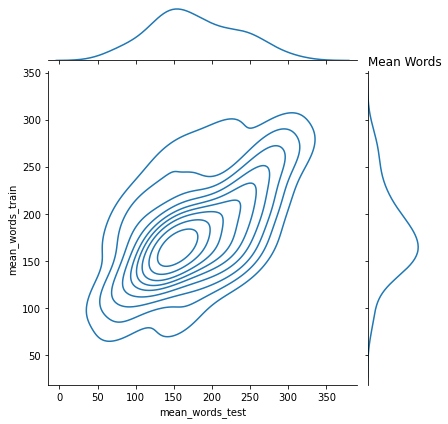

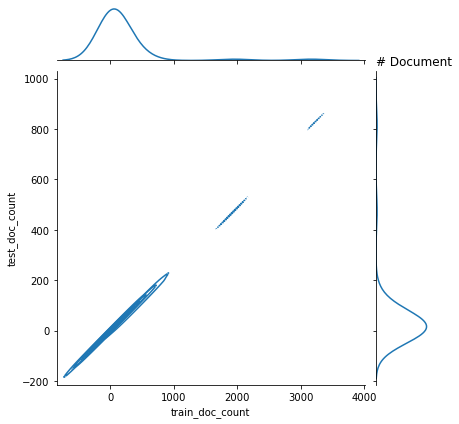

In [13]:
plt.figure(figsize=(15,7))
sns.jointplot(x = 'mean_words_test', y = 'mean_words_train', data = df, kind = 'kde')
plt.title("Mean Words", loc="left")

sns.jointplot(x = 'train_doc_count', y = 'test_doc_count', data = df, kind = 'kde')
plt.title("# Document",loc="left")
plt.show()


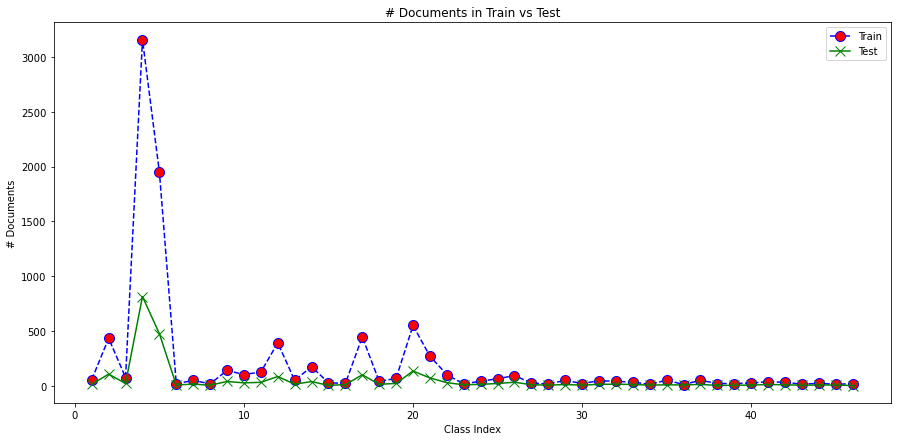

In [14]:
plt.figure(figsize=(15,7))
plt.plot(range(1,47),df["train_doc_count"],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label= "Train")
plt.plot(range(1,47),df["test_doc_count"],color='green', linestyle='-', marker='x',
         markerfacecolor='black', markersize=10, label= "Test")
plt.legend()
plt.title('# Documents in Train vs Test')
plt.xlabel('Class Index')
plt.ylabel('# Documents')
plt.show()

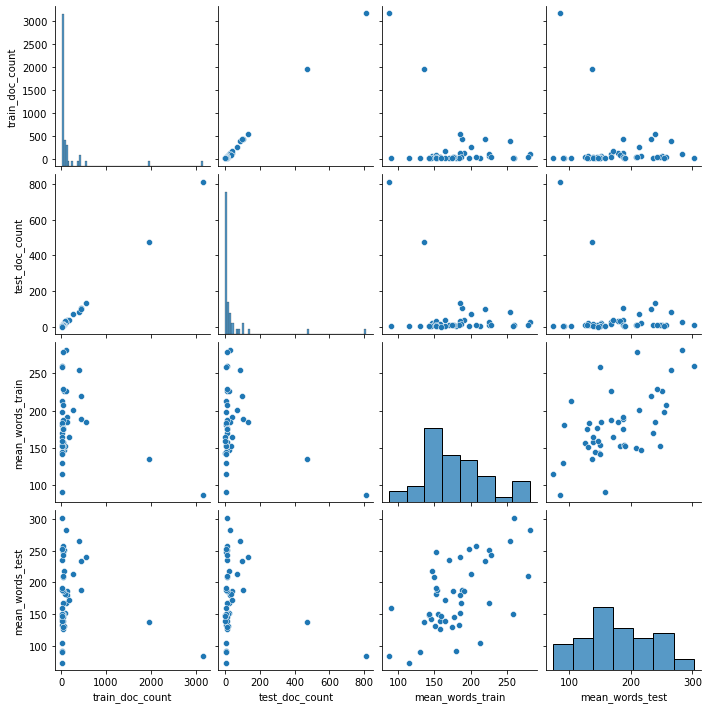

In [15]:
sns.pairplot(df)

### Question 2: Find the best setting of your neural network between the following options using grid search and random search, which gives you the best results based on the “test” data set by trying


In [44]:
tf.random.set_seed(64)
def create_model(optimizer, neurons1, neurons2):
    
    # create model
    model = Sequential()
    
    model.add(Dense(neurons1, activation='selu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(neurons2, activation='selu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(46, activation='softmax'))
    
    # Compile model
    model.compile(loss="categorical_crossentropy", 
                    optimizer=optimizer,  # OPTIMIZER
                    metrics=["accuracy"]) # Accuracy performance metric
    return model

# Create Hyperparameters 
epochs = [10, 50]
optimizer = ['rmsprop', 'adamax', 'nadam','adagrad']
neurons1 = [32, 100, 100, 200]
neurons2 = [32, 32, 100, 200]

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=300, verbose=0)

# Create hyperparameter options
param_grid = dict(optimizer=optimizer, neurons1=neurons1, neurons2=neurons2,epochs=epochs )

In [46]:
# Create grid search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit gird search
grid_result = grid.fit(features_test, Y_test) # Search results based on the “test” data 

# summarize results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

2021-10-22 09:29:32.464586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:32.547765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:32.584673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:32.631308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:32.744283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:33.204249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:33.955281: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:29:43.302248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:44.261739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:44.295426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:44.298068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:44.849513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:45.035682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:45.153212: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:29:47.912935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:48.177264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:48.213845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:48.227975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:48.314842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:48.901968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:48.978325: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:29:55.222926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:55.234682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:55.661438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:55.796554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:58.307232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:58.491574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:29:58.511556: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:30:10.725209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:10.838561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:11.499601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:11.813484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:13.288638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:13.301440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:13.318018: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:30:26.830002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:27.101142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:33.191442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:33.681464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:33.932235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:36.104238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:30:36.214239: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:31:15.076797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:31:20.718802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:31:20.861966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:31:21.223248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:31:21.308048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:31:22.652620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:31:23.692763: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:32:04.934669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:05.256416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:06.047039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:07.439518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:07.875094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:07.984941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:08.390893: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:32:52.480677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:52.513245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:55.490774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:55.548833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:56.241532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:59.554669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:32:59.605461: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:33:21.188511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Best: 0.7631322145462036 using {'epochs': 50, 'neurons1': 100, 'neurons2': 200, 'optimizer': 'nadam'}


In [45]:
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                            n_iter=4, n_jobs=-1) 


rand_output = rand.fit(features_test, Y_test) # Search results based on the “test” data 
print("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))

Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Kernel
Init Kernel
Init Graph Optimizer
Init Kernel
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2021-10-22 09:27:32.077920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-22 09:27:32.078183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-10-22 09:27:32.082808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-22 09:27:32.082964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

2021-10-22 09:27:46.910203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:27:47.013831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:27:51.797700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:27:52.105193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:27:52.116905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:27:54.473532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-22 09:27:54.588105: I tensorflow/core/grappler/optimizers/cust

2021-10-22 09:27:55.000178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Best: 0.7680326938629151 using {'optimizer': 'nadam', 'neurons2': 200, 'neurons1': 100, 'epochs': 50}


### Question 3: Find the best MLP with two hidden layers neural network that gives you the best performance. There is no limit on your choices, except the structure and number of hidden layers. 
Bonus: The best performance will get an extra 20 points.


In [47]:
if grid_result.best_score_ > rand_output.best_score_:
    print("Grid Search gave best parameters")
    best_para = grid_result.best_params_
else:
    print("Random Search gave best parameters")
    best_para = rand_output.best_params_

Random Search gave best parameters


In [48]:
best_para

{'optimizer': 'nadam', 'neurons2': 200, 'neurons1': 100, 'epochs': 50}

In [61]:
mlp = best_model(best_para)
losses = pd.DataFrame(mlp.history.history)

Epoch 1/50
 4/30 [===>..........................] - ETA: 0s - loss: 3.3701 - accuracy: 0.3333

2021-10-25 11:47:30.479535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 26ms/step - loss: 1.9116 - accuracy: 0.5867 - val_loss: 1.2233 - val_accuracy: 0.7275
Epoch 2/50
 4/30 [===>..........................] - ETA: 0s - loss: 1.0511 - accuracy: 0.7583

2021-10-25 11:47:31.244885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 23ms/step - loss: 0.9344 - accuracy: 0.7950 - val_loss: 0.9497 - val_accuracy: 0.7818
Epoch 3/50
30/30 [==============================] - 1s 23ms/step - loss: 0.6042 - accuracy: 0.8709 - val_loss: 0.8585 - val_accuracy: 0.8081
Epoch 4/50
30/30 [==============================] - 1s 23ms/step - loss: 0.4163 - accuracy: 0.9103 - val_loss: 0.8502 - val_accuracy: 0.8063
Epoch 5/50
30/30 [==============================] - 1s 22ms/step - loss: 0.3009 - accuracy: 0.9342 - val_loss: 0.8739 - val_accuracy: 0.8050
Epoch 6/50
30/30 [==============================] - 1s 23ms/step - loss: 0.2460 - accuracy: 0.9399 - val_loss: 0.9035 - val_accuracy: 0.8041
Epoch 7/50
30/30 [==============================] - 1s 23ms/step - loss: 0.2092 - accuracy: 0.9462 - val_loss: 0.9298 - val_accuracy: 0.8045
Epoch 00007: early stopping


### Question 4: Plot training and test set results for the best model.

<AxesSubplot:title={'center':'Train_Loss vs Test_Loss'}, xlabel='Epochs', ylabel='Error_Rate'>

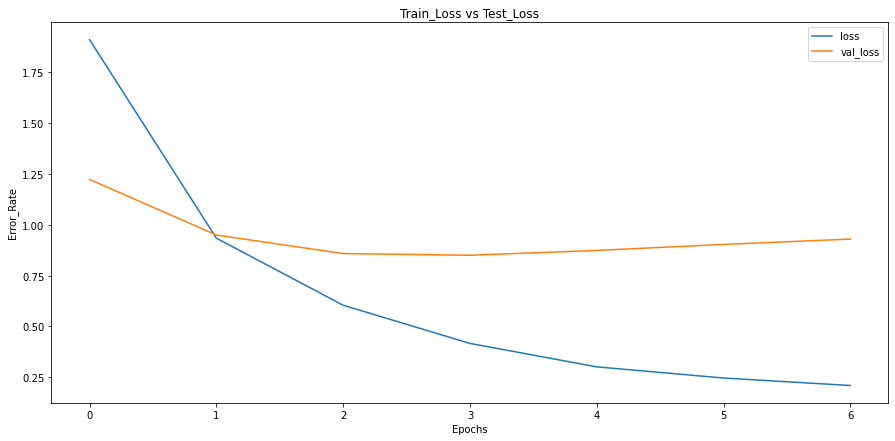

In [62]:
losses[['loss','val_loss']].plot(figsize=(15,7), 
                                 title="Train_Loss vs Test_Loss", 
                                 xlabel="Epochs",
                                 ylabel="Error_Rate")

<AxesSubplot:title={'center':'Train_Accuracy vs Test_Accuracy'}, xlabel='Epochs', ylabel='Accuracy_Score'>

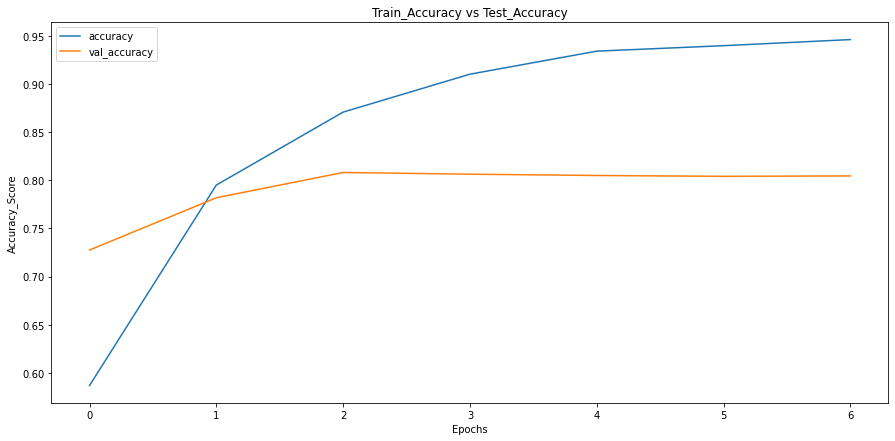

In [63]:
losses[['accuracy','val_accuracy']].plot(figsize=(15,7), 
                                         title="Train_Accuracy vs Test_Accuracy", 
                                         xlabel="Epochs",
                                        ylabel="Accuracy_Score")

In [65]:
from tensorflow.keras.optimizers import Nadam, Adadelta, Adagrad, Adamax, RMSprop